#  Scotogenic Singlet Dark Matter

(Re)compile everything

In [ ]:
%%bash
cd ..
./compile_spheno_directly.sh DMLR > /dev/null 
cd micromegas
make >/dev/null 2>/dev/null && make >/dev/null 2>/dev/null
cd DMLR
make main=CalcOmega.cpp >/dev/null

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check point with IDM official

In [3]:
a=hep(MODEL='DMLR')
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

In [4]:
a.LHA.blocks

OrderedDict([('MODSEL',
              MODSEL { 1 : 1              #  1/0: High/low scale input ; 2 : 1              # Boundary Condition  ; 6 : 1              # Generation Mixing  }),
             ('SMINPUTS',
              SMINPUTS { 2 : 1.166370E-05   # G_F,Fermi constant ; 3 : 1.187000E-01   # alpha_s(MZ) SM MSbar ; 4 : 9.118870E+01   # Z-boson pole mass ; 5 : 4.180000E+00   # m_b(mb) SM MSbar ; 6 : 1.735000E+02   # m_top(pole) ; 7 : 1.776690E+00   # m_tau(pole)  }),
             ('MINPAR',
              MINPAR { 1 : 4.0000000E+03  # vRinput; 2 : 1.0000000E+01  # TanBeta; 3 : 1.0000000E-01  # lam1INPUT; 4 : 0.000000E+00   # lam2INPUT; 5 : 3.0000000E-01  # lam3INPUT; 6 : -1.5000000E-01 # lam4INPUT; 7 : 2.0000000E-04  # rho1INPUT; 8 : 5.0000000E-03  # rho2INPUT; 9 : 0.000000E+00   # alp1INPUT; 10 : 0.000000E+00   # alp2INPUT; 11 : -5.0000000E-03 # alp3INPUT; 13 : 1.0000000E+03  # M23INPUT }),
             ('SPHENOINPUT',
              SPHENOINPUT { 1 : -1             # error level ; 2

Check `a.config` for proper configurations.

In [6]:
#h,U,Mnuin,phases=a.to_yukawas() #test Mnuin/0.9628#/0.968
spc=a.runSPheno()
mo=commands.getoutput("../micromegas/DMLR/CalcOmega LesHouches.in.Scotogenic | grep -A10 'Omega h^2'")
print "====micrOMEGAS SARAH: ======"
print mo

====micrOMEGAS SARAH: ======
Xf=3.26e+01 Omega h^2=1.82e-03

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   11% ~cp ~Cpp ->d1 U1 
   11% ~cp ~Cpp ->d2 U2 
   11% ~cp ~Cpp ->d3 U3 
    6% ~cp ~c01 ->D1 u1 
    6% ~cp ~c02 ->D1 u1 
    6% ~cp ~c01 ->D2 u2 
    6% ~cp ~c02 ->D2 u2 


In [7]:
def xtoipt(x,lha,param={'block_name':'MNIN','block_key':(1,1)}):
    '''obtain LHA output from varible input'''
    block=param['block_name'];bkey=param['block_key']
    comment=lha.blocks[block][bkey].split('#')
    if len(comment)>1:
        comment=comment[1]
        lha.blocks[block][bkey]='%0.8E       # %s' %(x,comment)
        
    return lha

In [8]:
a=hep(MODEL='DMLR')
for bl in ['YDRIN','YL1IN','YL1IN']:
    for key in [(1,1),(2,2),(3,3)]:
        a.LHA.blocks[bl][key]='%.8E       # %s%s' %(0,bl.replace('IN',''),key)

In [10]:
df=a.run_micromegas(xtoipt,param={'block_name':'MINPAR','block_key':13},var_min=100,var_max=20000,npoints=200,CI=False)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [24]:
df.Omega_h2[:1]

0    0.00375
Name: Omega_h2, dtype: float64

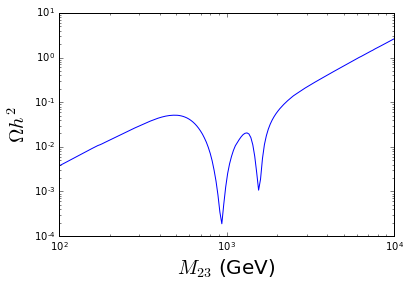

In [12]:
plt.loglog(df.M23INPUT,df.Omega_h2)
plt.xlabel('$M_{23}$ (GeV)',size=20)
plt.ylabel('$\Omega h^2$',size=20)
plt.xlim(100,10000)
plt.ylim(1E-4,10)
plt.savefig('out.png')

In [38]:
if 1==1:
    if 1==1:
        a.LHA_out.

In [40]:
a.LHA_out.blocks

OrderedDict([('SPINFO', SPINFO { 1 : SPhenoSARAH; 2 : v3.3.8; 9 : 4.8.1 }),
             ('MODSEL', MODSEL { 1 : 1; 2 : 1; 6 : 1 }),
             ('MINPAR',
              MINPAR { 1 :  4e+03; 2 :  10; 3 :  0.1; 4 :  0; 5 :  0.3; 6 : -0.15; 7 :  0.0002; 8 :  0.005; 9 :  0; 10 :  0; 11 : -0.005; 13 :  2e+04 }),
             ('GAUGEGUT',
              GAUGEGUT (Q=-1.0) { 1 :  0; 2 :  0; 3 :  0; 4 :  0 }),
             ('SMINPUTS',
              SMINPUTS { 2 :  1.17e-05; 3 :  0.119; 4 :  91.2; 5 :  4.18; 6 :  174; 7 :  1.78 }),
             ('GAUGE',
              GAUGE (Q=160.0) { 4 :  0.422; 2 :  0.663; 5 :  0.663; 3 :  1.22 }),
             ('LRINPUT',
              LRINPUT (Q=160.0) { 9 :  0.005; 7 :  0.0002; 14 :  0; 1 :  0.1; 20 : -0.005; 16 :  0; 5 : -0.15; 2 :  0; 4 :  0.3; 201 :  2e+04; 103 :  3.05e+03; 98 : -8.37e+03; 100 : -3.25e+04 }),
             ('VEV', VEV (Q=160.0) { 4 :  4e+03; 1 :  24.5; 2 :  245 }),
             ('PHASET', PHASET (Q=160.0) { 1 :  1 }),
             ('TH

In [ ]:
copy.deepcopy

In [6]:
import copy
b=copy.deepcopy(a.LHA)

In [10]:
b.blocks['MASS']=1

In [12]:
b.blocks['MASS']

1

In [64]:
a.LHA.blocks

OrderedDict([('MODSEL',
              MODSEL { 1 : 2; 2 : 1              # Boundary Condition  ; 6 : 1              # Generation Mixing  }),
             ('SMINPUTS',
              SMINPUTS { 2 : 1.166370E-05   # G_F,Fermi constant ; 3 : 1.187000E-01   # alpha_s(MZ) SM MSbar ; 4 : 9.118870E+01   # Z-boson pole mass ; 5 : 4.180000E+00   # m_b(mb) SM MSbar ; 6 : 1.735000E+02   # m_top(pole) ; 7 : 1.776690E+00   # m_tau(pole)  }),
             ('MINPAR',
              MINPAR { 1 : 4.0000000E+03  # vRinput; 2 : 1.0000000E+01  # TanBeta; 3 : 1.0000000E-01  # lam1INPUT; 4 : 0.000000E+00   # lam2INPUT; 5 : 3.0000000E-01  # lam3INPUT; 6 : -1.5000000E-01 # lam4INPUT; 7 : 2.0000000E-04  # rho1INPUT; 8 : 5.0000000E-03  # rho2INPUT; 9 : 0.000000E+00   # alp1INPUT; 10 : 0.000000E+00   # alp2INPUT; 11 : -5.0000000E-03 # alp3INPUT; 13 : 1.0000000E+03  # M23INPUT }),
             ('SPHENOINPUT',
              SPHENOINPUT { 1 : -1             # error level ; 2 : 0              # SPA conventions ; 11 : 

In [45]:
b.blocks['MASS'].entries[25]=58

AttributeError: 'dict' object has no attribute 'entries'

In [20]:
a.pdg.pdgid_to_name(25)

'H0'

In [21]:
a.pdg.pdgid_names.has_key(25)

True

In [31]:
k=25
print '%.8E    # prt_%d' %(b.blocks['MASS'].entries[k],k)

5.89569252E+01    #prt_25


In [38]:
sm=range(1,7)+range(11,17,2)+[23,24]
sm

[1, 2, 3, 4, 5, 6, 11, 13, 15, 23, 24]

In [25]:

for k in b.blocks['MASS'].entries.keys():
    if a.pdg.pdgid_names.has_key(k):
        b.blocks['MASS'].entries[k]='%.8E    # prt_%d' %(b.blocks['MASS'].entries[k],)   

[25,
 35,
 335,
 36,
 37,
 9000055,
 23,
 32,
 24,
 34,
 1,
 3,
 5,
 2,
 4,
 6,
 11,
 13,
 15,
 12,
 14,
 16,
 6000012,
 6000014,
 6000016,
 6000055,
 17,
 9000012,
 9000014]

In [34]:
cat SPheno.spc.DMLR | grep -A40 -i 'block mass'

Block MASS  # Mass spectrum
#   PDG code      mass          particle
        25     5.89569252E+01  # hh_1
        35     1.18606587E+02  # hh_2
       335     2.92176682E+02  # hh_3
        36     2.77817966E+02  # Ah_3
        37     2.02193870E+02  # Hpm_3
   9000055     4.00185657E+02  # deltaRpp
        23     9.11887000E+01  # VZ
        32     3.14309761E+03  # VZR
        24     8.03497269E+01  # VWLm
        34     1.87668736E+03  # VWRm
         1     5.00000000E-03  # Fd_1
         3     9.50000000E-02  # Fd_2
         5     4.18000000E+00  # Fd_3
         2     2.50000000E-03  # Fu_1
         4     1.27000000E+00  # Fu_2
         6     1.73500000E+02  # Fu_3
        11     5.10998930E-04  # Fe_1
        13     1.05658372E-01  # Fe_2
        15     1.77669000E+00  # Fe_3
        12    -1.27640984E-10  # Fv_1
        14    -1.27640984E-10  # Fv_2
        16    -1.27640984E-10  # Fv_3
   6000012    -1.27640984E-10  # Fv_4
   6000014    -1.27640984E-10  # Fv_5
   6000016    -1.

In [36]:
1+1

2